Missing Values:
 date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

Duplicate Rows: 0

Summary Statistics:
                 open           high            low          close  \
count  927150.000000  927150.000000  927150.000000  927150.000000   
mean     1774.644022    1775.620687    1773.643158    1774.635481   
std       397.734868     397.958363     397.488900     397.732418   
min       896.000000     899.100000     895.150000     896.500000   
25%      1462.300000    1463.000000    1461.500000    1462.250000   
50%      1657.150000    1658.050000    1656.200000    1657.100000   
75%      2084.450000    2085.500000    2083.200000    2084.500000   
max      2841.300000    2844.000000    2837.000000    2842.400000   

              volume  
count  927150.000000  
mean     1631.773809  
std      4912.037432  
min         0.000000  
25%       234.000000  
50%       643.000000  
75%      1639.000000  
max    962709.000000  


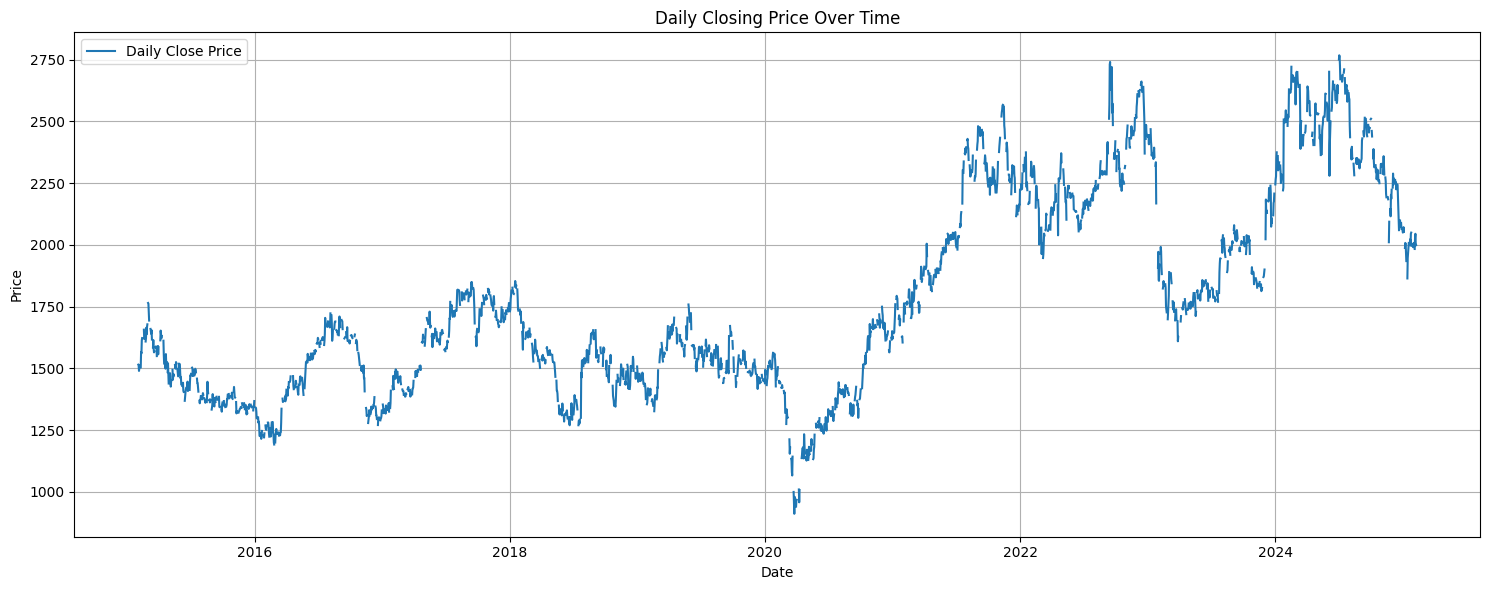

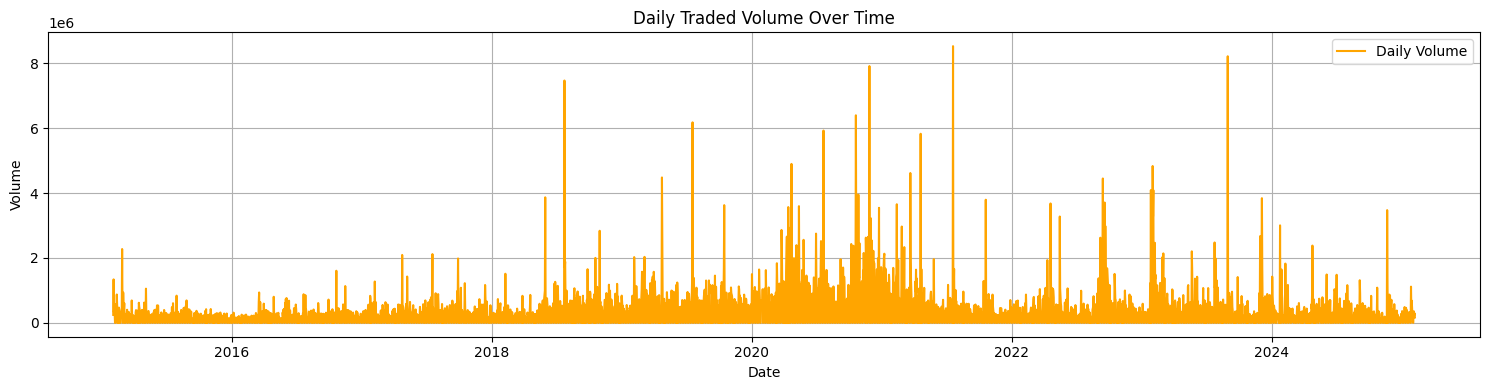

<ipython-input-1-c854b6cf6ec5>:56: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample('M').agg({


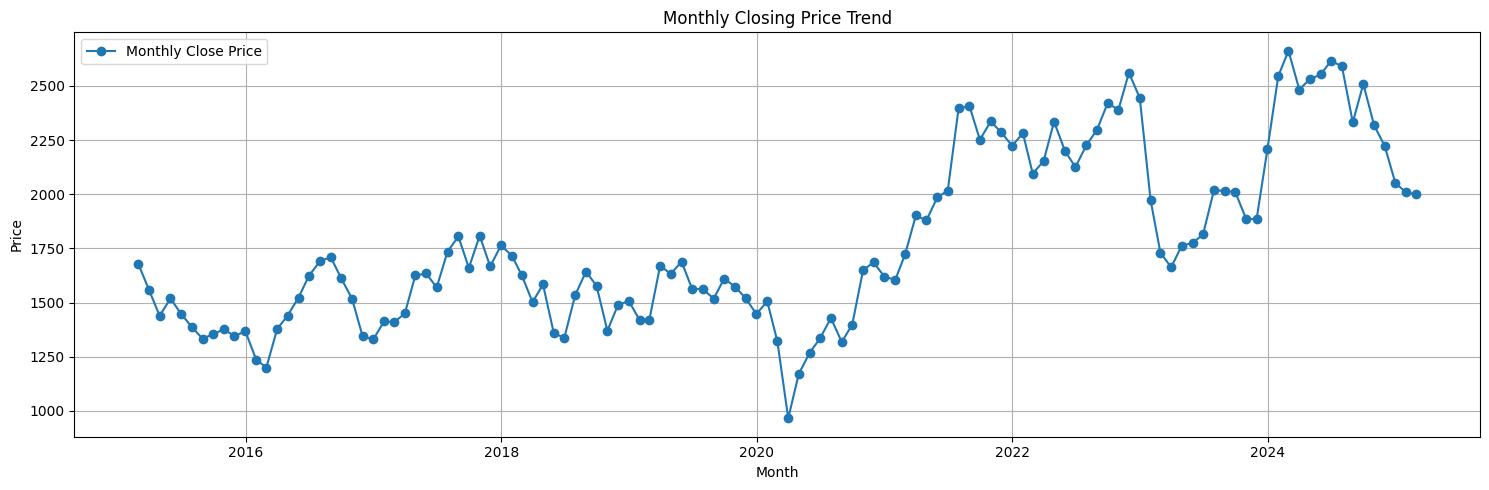

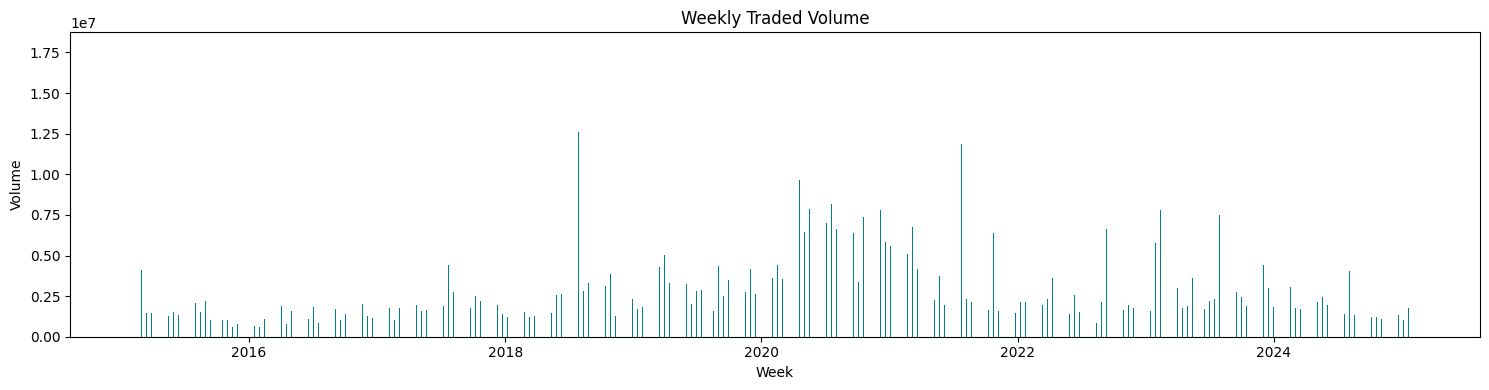

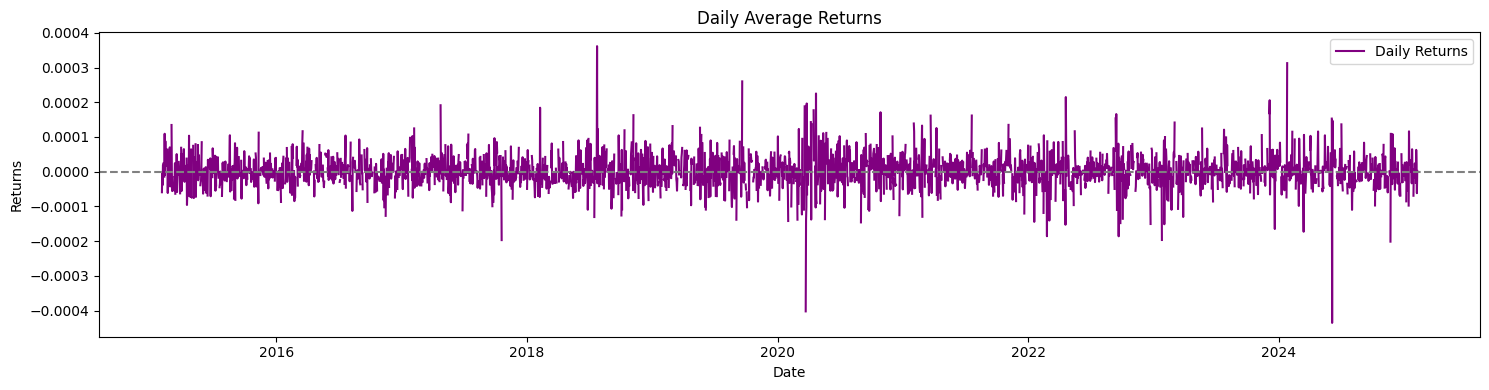

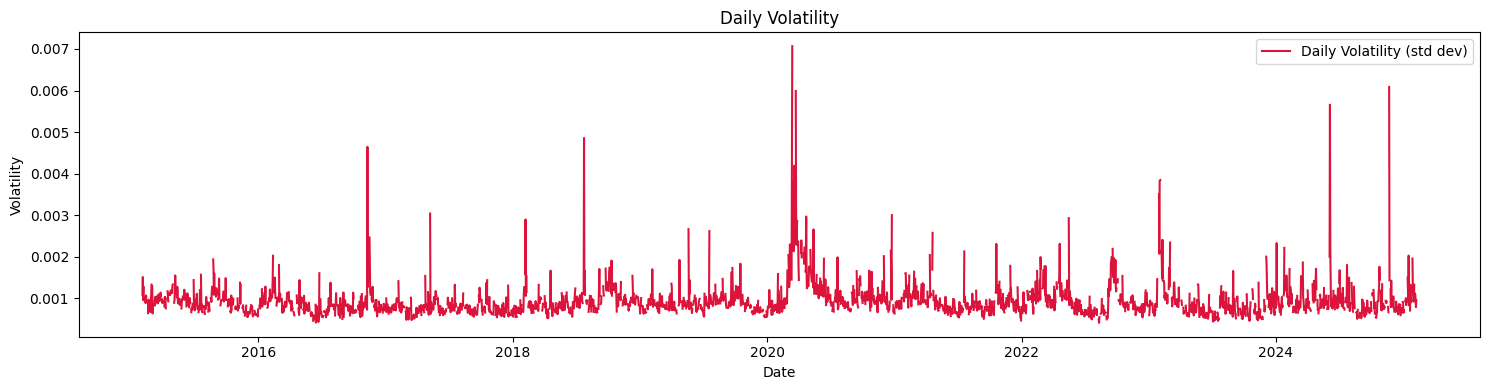

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plots
%matplotlib inline

# Load the dataset
df = pd.read_csv("ACC_minute.csv")

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Check for missing values and duplicates
print("Missing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

# Set date as index
df.set_index('date', inplace=True)

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Daily aggregated data
daily_df = df.resample('D').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})

# Plot Daily Close Price
plt.figure(figsize=(15, 6))
plt.plot(daily_df.index, daily_df['close'], label='Daily Close Price')
plt.title('Daily Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Daily Volume
plt.figure(figsize=(15, 4))
plt.plot(daily_df.index, daily_df['volume'], color='orange', label='Daily Volume')
plt.title('Daily Traded Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Monthly and Weekly aggregates
monthly_df = df.resample('M').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})

weekly_df = df.resample('W').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})

# Plot Monthly Close Price
plt.figure(figsize=(15, 5))
plt.plot(monthly_df.index, monthly_df['close'], marker='o', label='Monthly Close Price')
plt.title('Monthly Closing Price Trend')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Weekly Volume
plt.figure(figsize=(15, 4))
plt.bar(weekly_df.index, weekly_df['volume'], color='teal')
plt.title('Weekly Traded Volume')
plt.xlabel('Week')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

# Returns & Volatility
df['returns'] = df['close'].pct_change()
daily_returns = df['returns'].resample('D').mean()
daily_volatility = df['returns'].resample('D').std()

# Plot Daily Returns
plt.figure(figsize=(15, 4))
plt.plot(daily_returns.index, daily_returns, label='Daily Returns', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Daily Average Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Daily Volatility
plt.figure(figsize=(15, 4))
plt.plot(daily_volatility.index, daily_volatility, label='Daily Volatility (std dev)', color='crimson')
plt.title('Daily Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.tight_layout()
plt.show()
